In [1]:
import qsample as qs
import time
import stim
import numpy as np
import matplotlib.pyplot as plt
import time
import re
from tqdm.notebook import tqdm
import random

# QSample

In [2]:
left = qs.Circuit([  {"init": {0}},
                    {"H": {0}},
                    {"measure": {0}} ])

right = qs.Circuit([{"measure": {0}}], noisy = False)

COR = qs.Circuit([{"X": {0}}], noisy=False)

basic = qs.Protocol()
basic.add_nodes_from(['left', 'COR', 'right'], circuits=[left, COR, right])
basic.add_edge('START', 'left', check='True')
basic.add_edge('left', 'right', check='left[-1]==1')
basic.add_edge('left', 'COR', check='left[-1]==0')
basic.add_edge('COR', 'right', check='True')
basic.add_edge('right', 'FAIL', check='right[-1] == 1')

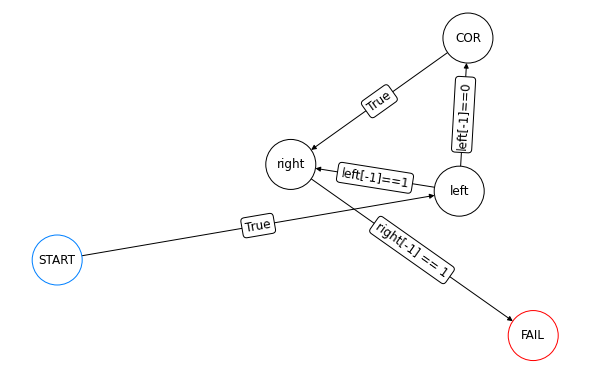

In [3]:
basic.draw(figsize=(8,5))

In [4]:
err_model = qs.noise.E1
q = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5]
err_params = {'q': q}

In [5]:
begin = time.time()
ss_sam = qs.SubsetSampler(protocol=basic, simulator=qs.StabilizerSimulator,  p_max={'q': 0.1}, err_model=err_model, err_params=err_params, L=3)
ss_sam.run(10)
end = time.time()
qsample_time = end-begin

p=('1.00e-01',):   0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
ss_sam.stats()

[array([1., 1., 1., 1., 1., 1.]),
 array([3.59035165e-06, 3.59035165e-05, 3.59035165e-04, 3.59035165e-03,
        3.59035165e-02, 1.79517583e-01]),
 array([1.        , 1.00000001, 1.000001  , 1.0001    , 1.01      ,
        1.25      ]),
 array([2.57694102e-06, 2.57694103e-05, 2.57694223e-04, 2.57706228e-03,
        2.58903940e-02, 1.43205490e-01])]

## STIM

In [7]:
left = qs.StimCircuit("""H 0\nM 0""")

right = qs.StimCircuit("""M 0""", noisy =False)

COR = qs.StimCircuit("""X 0""", noisy=False)

basic = qs.Protocol()
basic.add_nodes_from(['left', 'COR', 'right'], circuits=[left, COR, right])
basic.add_edge('START', 'left', check='True')
basic.add_edge('left', 'right', check='left[-1]==1')
basic.add_edge('left', 'COR', check='left[-1]==0')
basic.add_edge('COR', 'right', check='True')
basic.add_edge('right', 'FAIL', check='right[-1] == 1')

In [8]:
begin = time.time()
ss_sam = qs.SubsetSampler(protocol=basic, simulator=qs.StabilizerSimulator,  p_max={'q': 0.1}, err_model=err_model, err_params=err_params, L=3)
ss_sam.run(10)
end = time.time()
qsample_time = end-begin

p=('1.00e-01',):   0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
ss_sam.stats()

[array([1., 1., 1., 1., 1., 1.]),
 array([1.56404245e-06, 1.56404245e-05, 1.56404245e-04, 1.56404245e-03,
        1.56404245e-02, 7.82021224e-02]),
 array([1.        , 1.00000001, 1.00000067, 1.00006667, 1.00666667,
        1.16666667]),
 array([1.56404245e-06, 1.56404247e-05, 1.56404428e-04, 1.56422559e-03,
        1.58225170e-02, 9.84697980e-02])]